<h1> TUTORIAL TWO: </h1>
<h1> RUNNING GP BACKGROUNDS </h1>
<h3> Author: Lindsey Gordon. Last Update: 11-27-22 </h3>

How to run this with GP background modelling

In [1]:
#load in modules
import numpy as np
from etsfit import etsMAIN
import etsfit.utils.utilities as ut
import pandas as pd

2018hzh 04 3 1


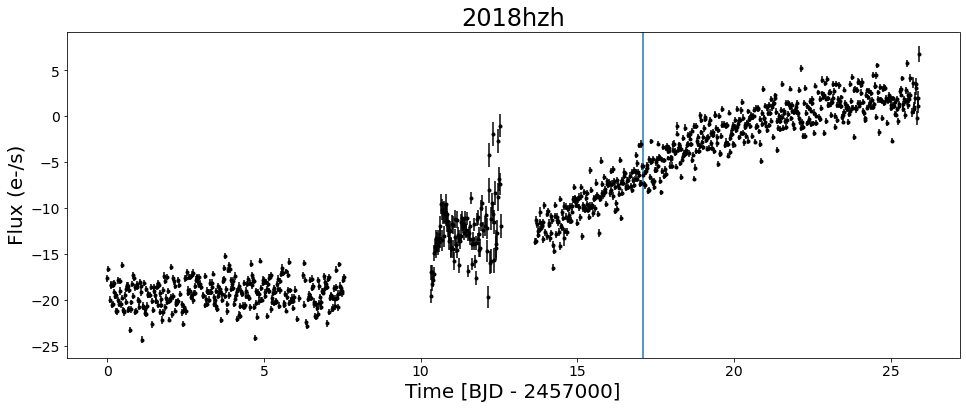

In [2]:
# THINGS YOU SAW IN TUTORIAL 1
#TNS info:
TNSFile = "./tutorial_data/2018hzh_TNS.csv"
TNSinfo = pd.read_csv(TNSFile)
#data file:
dataFile = "./tutorial_data/2018hzh0431-tessreduce"

#saving into our local folder
folderSave = "."

#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
discoverytime = ut.get_disctime(TNSFile, targetlabel)

#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)
ets.test_plot()

The next cell demos how to run one of the GP fits. Currently only a single power law is supported as the base model. 

There are four GP options: 'celerite' (celerite matern 3/2), 'expsqr' (tinygp), expsinsqr (tinygp), and 'matern32' (tinygp)

In [3]:
gpUSE = "celerite"
ets.run_GP_fit(filterMade, n1=10000, n2=25000, gpUSE=gpUSE)

saving into folder:  ./2018hzh0431/celerite-matern32-None/
Initial log-likelihood: -9020.230729033028
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


100%|█████████████████████████████████████| 25000/25000 [08:45<00:00, 47.58it/s]


125000 samples post second run
t0 10.010251259036135 -0.04675156188409879 0.0451541830630422
A 3.51340619420767 -0.04913940601877398 0.04830280673170906
beta 0.6864867952157099 -0.004639561215208476 0.006573078580120906
b -20.340501317604463 -0.02023713474332922 0.02132019739609703
$log\sigma$ 1.4968666469394964 -0.002067744742919597 0.0009360022610764851
$log\rho$ 0.0009908740520057529 -0.0007525715739161334 0.002950916413577172
log prob: [-17972.31967988]
BAYESIAN INF CRIT:  [-35903.03297649]


<h2> running tingyp vs celerite comparisons </h2>
If you want to run a tinygp vs celerite matern-3/2 comparison run, try the next cell: 

In [3]:
#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
discoverytime = ut.get_disctime(TNSFile, targetlabel)

#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)
ets.run_both_matern32(filterMade)

2018hzh 04 3 1
saving into folder:  ./2018hzh0431/celerite-tinygp-matern32/
Using bounds
Initial celerite log-likelihood: -9020.230729033028
*** 
 *** 
 *** 
 ***
Beginning MCMC + GP run
Starting burn-in chain


100%|█████████████████████████████████████| 10000/10000 [02:47<00:00, 59.78it/s]


[[ 1.00027188e+01  3.50378431e+00  6.86004684e-01 -2.03444027e+01
   1.49650403e+00  8.78783153e-04]]
Initial negative log likelihood: 3651.666656706285
Final negative log likelihood: 3414.9624284737747


100%|█████████████████████████████████████| 20000/20000 [06:34<00:00, 50.71it/s]


300000 samples post second run
t0 10.010699298830719 -0.04735257914456703 0.04468592456465181
A 3.5141513899698023 -0.04975302000741033 0.047490512764639004
beta 0.6864302910225639 -0.004629173465291125 0.00662597120495334
b -20.340269741398274 -0.02051891101665504 0.02106797785934944
$log\sigma$ 1.4968606605607022 -0.002044512582667579 0.0009404374543133809
$log\rho$ 0.0010148274017257003 -0.0007769185445892175 0.0029217593443854584
neg. log prob for celerite:  [17972.67194801]
BIC (celerite)  [-35903.73751276]
BIC (tinygp):  [-27610.23902285]
